In [1]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.metrics import precision_score

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from scipy.stats.mstats import mode

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [3]:
def accuracy_precision_recall_precision_metrics(y_true, y_pred):
    
    y_test_scoring = convert_for_sklearn(y_true)
    test_pred_scoring = convert_for_sklearn(y_pred)

    precision = precision_score(y_true = ytest_scoring, y_pred = test_pred_scoring, average ='macro')
    
    print("Test precision score:",precision)

In [4]:
train = pd.read_csv("train.csv",index_col='customer_id')
test = pd.read_csv("test.csv",index_col='customer_id')

In [5]:
train.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
customer_id,,,,,,,,,,,
csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [6]:
train.tail()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
customer_id,,,,,,,,,,,
csid_10734,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA,0
csid_10735,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA,0
csid_10736,31.676844,7.799880,0.062961,-0.032765,0.318118,5.598486,2.403051,21.864188,A,BA,0
csid_10737,28.441780,5.588302,-0.093931,0.081586,0.132177,3.616492,4.972243,86.969977,B,AA,0
csid_10738,20.663035,4.478301,0.253165,0.381349,0.504904,4.181092,4.469215,27.770899,B,A,0


In [7]:
test.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
customer_id,,,,,,,,,,
csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [8]:
test.tail()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
customer_id,,,,,,,,,,
csid_17894,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,C,AA
csid_17895,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,C,BA
csid_17896,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,C,BA
csid_17897,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,C,BA
csid_17898,10.698835,12.173331,0.475469,0.014124,23.358252,10.805826,1.571717,0.133973,B,BA


In [9]:
print(train.shape)
print(test.shape)

(10738, 11)
(7160, 10)


In [10]:
print(train.nunique())
print(test.nunique())

customer_visit_score                10738
customer_product_search_score       10696
customer_ctr_score                  10738
customer_stay_score                 10701
customer_frequency_score            10738
customer_product_variation_score    10692
customer_order_score                10672
customer_affinity_score             10738
customer_active_segment                 5
X1                                      5
customer_category                       2
dtype: int64
customer_visit_score                7160
customer_product_search_score       7131
customer_ctr_score                  7160
customer_stay_score                 7144
customer_frequency_score            7160
customer_product_variation_score    7117
customer_order_score                7119
customer_affinity_score             7160
customer_active_segment                5
X1                                     5
dtype: int64


In [11]:
train.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [12]:
test.dtypes

customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
dtype: object

In [13]:
train.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


In [14]:
train.describe(include = 'object')

,customer_active_segment,X1
count,10715,10701
unique,5,5
top,C,BA
freq,4919,4511


In [15]:
test.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


In [16]:
test.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score
count,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


In [17]:
test.describe(include = 'object')

,customer_active_segment,X1
count,7148,7135
unique,5,5
top,C,BA
freq,3251,2810


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, csid_1 to csid_10738
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_visit_score              10738 non-null  float64
 1   customer_product_search_score     10696 non-null  float64
 2   customer_ctr_score                10738 non-null  float64
 3   customer_stay_score               10701 non-null  float64
 4   customer_frequency_score          10738 non-null  float64
 5   customer_product_variation_score  10692 non-null  float64
 6   customer_order_score              10672 non-null  float64
 7   customer_affinity_score           10738 non-null  float64
 8   customer_active_segment           10715 non-null  object 
 9   X1                                10701 non-null  object 
 10  customer_category                 10738 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 1006.7+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7160 entries, csid_10739 to csid_17898
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_visit_score              7160 non-null   float64
 1   customer_product_search_score     7131 non-null   float64
 2   customer_ctr_score                7160 non-null   float64
 3   customer_stay_score               7144 non-null   float64
 4   customer_frequency_score          7160 non-null   float64
 5   customer_product_variation_score  7117 non-null   float64
 6   customer_order_score              7119 non-null   float64
 7   customer_affinity_score           7160 non-null   float64
 8   customer_active_segment           7148 non-null   object 
 9   X1                                7135 non-null   object 
dtypes: float64(8), object(2)
memory usage: 615.3+ KB


In [20]:
train.isnull().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [21]:
test.isnull().sum()

customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [22]:
#!pip install pandas-profiling[notebook,html]

In [23]:
import pandas_profiling

In [24]:
#pandas_profiling.ProfileReport(train)

In [25]:
for col in ['customer_active_segment','X1','customer_category']:
    train[col] = train[col].astype('category')

In [26]:
for col in ['customer_active_segment','X1']:
    test[col] = test[col].astype('category')

In [27]:
cat_attr = list(train.select_dtypes("category").columns)
num_attr = list(train.columns.difference(cat_attr))

In [28]:
cat_attr

['customer_active_segment', 'X1', 'customer_category']

In [29]:
num_attr

['customer_affinity_score',
 'customer_ctr_score',
 'customer_frequency_score',
 'customer_order_score',
 'customer_product_search_score',
 'customer_product_variation_score',
 'customer_stay_score',
 'customer_visit_score']

In [30]:
train.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
customer_category                   category
dtype: object

In [31]:
test.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
dtype: object

## EDA

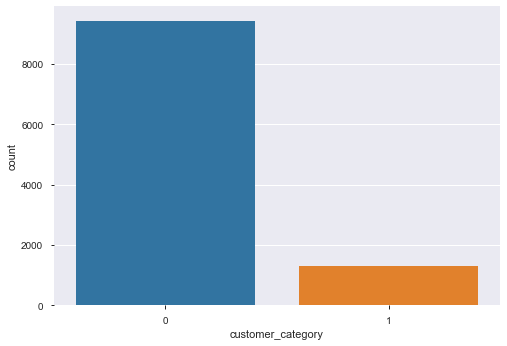

0    87.940026
1    12.059974
Name: customer_category, dtype: float64

In [32]:
sns.countplot(x='customer_category',data = train)
plt.show()

train.customer_category.value_counts(normalize = True)*100

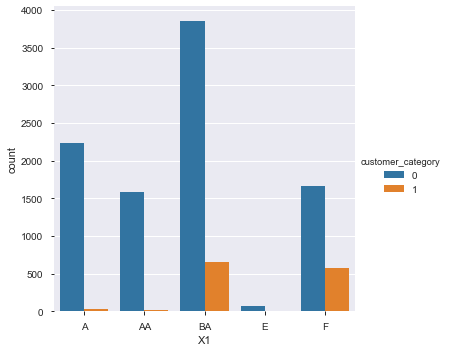

In [33]:
sns.factorplot('X1',data = train, hue = 'customer_category',kind = 'count')

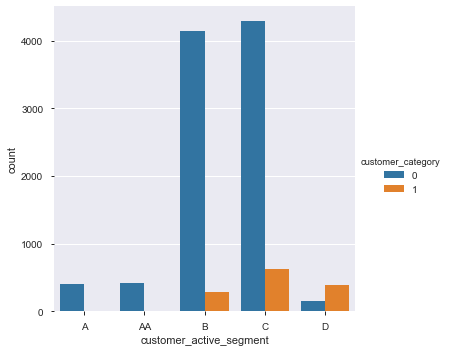

In [34]:
sns.factorplot('customer_active_segment',data = train, hue = 'customer_category',kind = 'count')

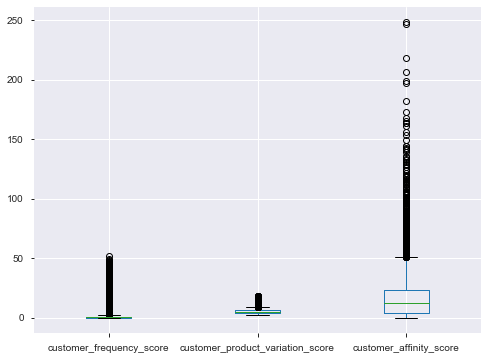

In [35]:
box = train.boxplot(column=['customer_frequency_score', 'customer_product_variation_score', 'customer_affinity_score'], figsize=(8,6))

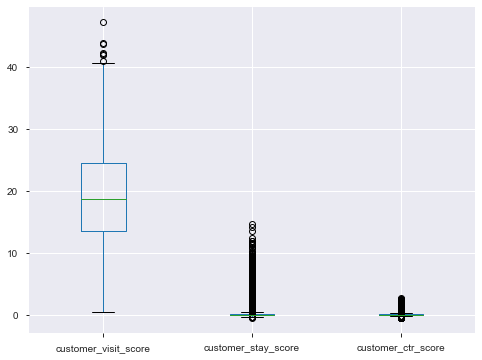

In [36]:
box = train.boxplot(column=['customer_visit_score', 'customer_stay_score', 'customer_ctr_score'], figsize=(8,6))

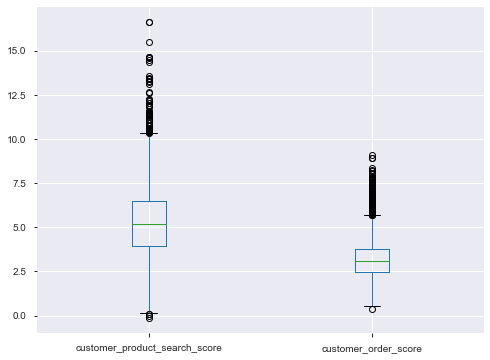

In [37]:
box = train.boxplot(column=['customer_product_search_score', 'customer_order_score'], figsize=(8,6))

BA    658
F     577
A      32
AA     22
E       2
Name: X1, dtype: int64

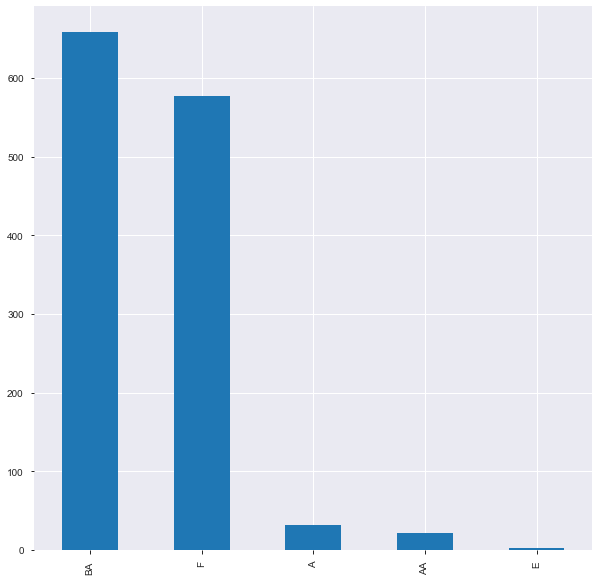

In [38]:
count = train[train.customer_category == 1].X1.value_counts()
count.head(10).plot(kind="bar", figsize =(10,10))
count.head(10)

C     624
D     381
B     284
AA      2
A       2
Name: customer_active_segment, dtype: int64

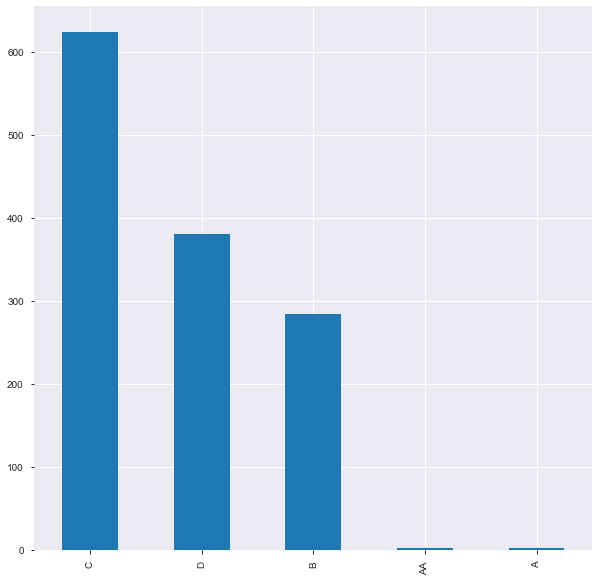

In [39]:
count = train[train.customer_category == 1].customer_active_segment.value_counts()
count.head(10).plot(kind="bar", figsize =(10,10))
count.head(10)

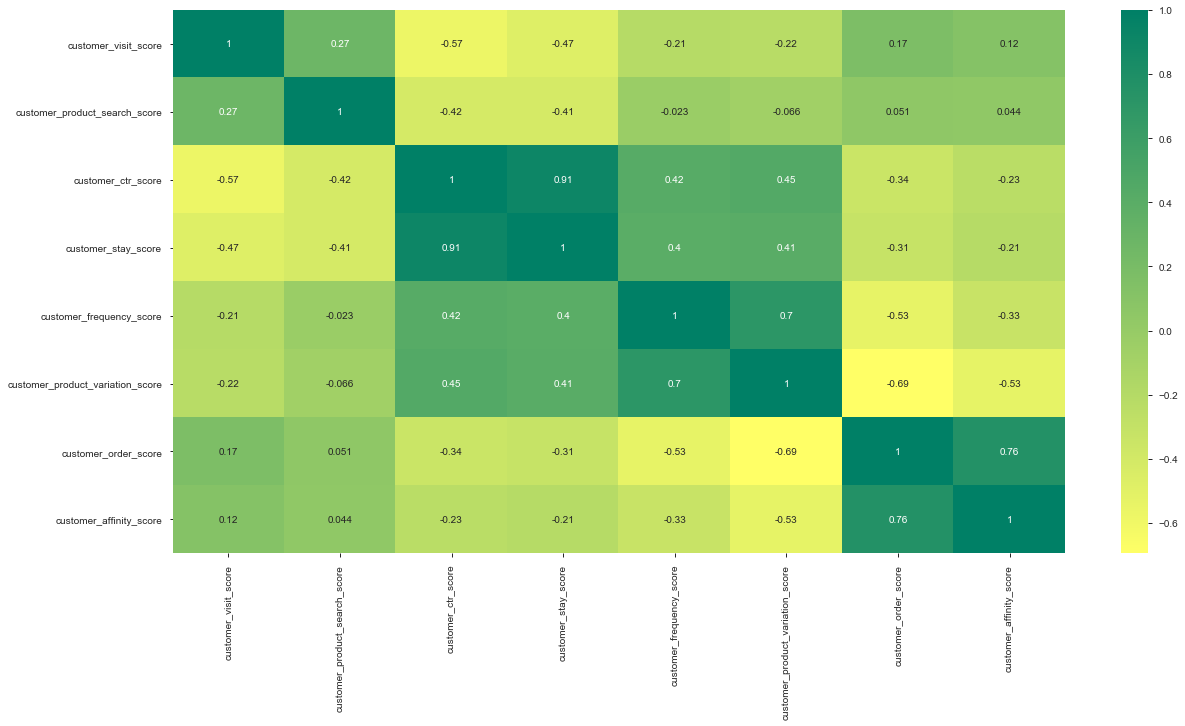

In [40]:
corrmat = train.corr()

plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, cmap = 'summer_r')

In [41]:
traincat_attr.pop(0)

NameError: name 'traincat_attr' is not defined

In [42]:
train.dtypes

customer_visit_score                 float64
customer_product_search_score        float64
customer_ctr_score                   float64
customer_stay_score                  float64
customer_frequency_score             float64
customer_product_variation_score     float64
customer_order_score                 float64
customer_affinity_score              float64
customer_active_segment             category
X1                                  category
customer_category                   category
dtype: object

### Label Encoding

In [43]:
lb = LabelEncoder()

In [44]:
for col in ['X1']:
    train[col] = train[col].astype('str')

In [45]:
for col in ['X1']:
    test[col] = test[col].astype('str')

In [46]:
train['X1'] = lb.fit_transform(train['X1'])

In [47]:
test['X1'] = lb.fit_transform(test['X1'])

In [48]:
for col in ['customer_active_segment']:
    train[col] = train[col].astype('str')

In [49]:
for col in ['customer_active_segment']:
    test[col] = test[col].astype('str')

In [50]:
train['customer_active_segment'] = lb.fit_transform(train['customer_active_segment'])

In [51]:
test['customer_active_segment'] = lb.fit_transform(test['customer_active_segment'])

In [52]:
train.head(2)

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
customer_id,,,,,,,,,,,
csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,3,4,0
csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,3,0,0


In [53]:
train.isnull().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment              0
X1                                   0
customer_category                    0
dtype: int64

In [54]:
test.head(2)

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
customer_id,,,,,,,,,,
csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1


In [55]:
test.isnull().sum()

customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment              0
X1                                   0
dtype: int64

In [56]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(train[num_attr])

train[num_attr] = imputer.transform(train[num_attr])
test[num_attr] = imputer.transform(test[num_attr])

imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(train[cat_attr])

train[cat_attr] = imputer.transform(train[cat_attr])
test[cat_attr] = imputer.transform(test[cat_attr])

In [57]:
imputer.statistics_

array([12.65335707,  0.07407814,  0.51682994,  3.11839417,  5.21847929,
        4.84257459,  0.03720079, 18.77410921])

In [58]:
train.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

In [59]:
test.isnull().sum()

customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

In [60]:
train.shape, test.shape

((10738, 11), (7160, 10))

In [61]:
X, y = train.loc[:,train.columns!='customer_category'], train.loc[:,'customer_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify =y,random_state=3)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7516, 10), (3222, 10), (7516,), (3222,))

#### Logistic Regression

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

In [65]:
print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,test_pred))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_test,test_pred))

Confusion matrix 

[[2813   20]
 [  78  311]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6610
           1       0.96      0.82      0.89       906

    accuracy                           0.97      7516
   macro avg       0.97      0.91      0.94      7516
weighted avg       0.97      0.97      0.97      7516

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2833
           1       0.94      0.80      0.86       389

    accuracy                           0.97      3222
   macro avg       0.96      0.90      0.92      3222
weighted avg       0.97      0.97      0.97      3222



In [66]:
model1_log = logreg.predict(test)
model1_log

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
df  = pd.read_csv("test.csv")

In [68]:
DF = pd.DataFrame(list(zip(df['customer_id'],model1_log)),columns=['customer_id','customer_category'])
DF.to_csv("Log.csv",index=False)
DF.shape

(7160, 2)

#### Decision Tree

In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [71]:
dt_params = {'criterion': ['entropy', 'gini'],
             'max_depth': [6,8,9,10],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 2, 3],
             'class_weight':['balanced']}

In [72]:
dt_grid = GridSearchCV(dt, param_grid=dt_params, cv=10, scoring = 'precision_macro')

In [73]:
%%time
dt_grid.fit(X_train,y_train)

CPU times: user 40.8 s, sys: 416 ms, total: 41.3 s
Wall time: 49.4 s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                      

In [74]:
dt_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [75]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

In [76]:
print(dt_grid.score(X_train, y_train))
print(dt_grid.score(X_test, y_test))
print("\n")
print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)
confusion_matrix_test

0.9258707449741816
0.8866611086206968


[[6475  135]
 [  65  841]]


array([[2744,   89],
       [  51,  338]])

In [77]:
print('Classification report \n')
print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_test,test_pred))

Classification report 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6610
           1       0.86      0.93      0.89       906

    accuracy                           0.97      7516
   macro avg       0.93      0.95      0.94      7516
weighted avg       0.97      0.97      0.97      7516

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2833
           1       0.79      0.87      0.83       389

    accuracy                           0.96      3222
   macro avg       0.89      0.92      0.90      3222
weighted avg       0.96      0.96      0.96      3222



In [78]:
model2_dt = dt_grid.predict(test)
model2_dt

array([0, 0, 0, ..., 0, 0, 1])

In [79]:
df  = pd.read_csv("test.csv")

In [80]:
DF = pd.DataFrame(list(zip(df['customer_id'],model2_dt)),columns=['customer_id','customer_category'])
DF.to_csv("DT.csv",index=False)
DF.shape

(7160, 2)

#### Understanding the important features

In [81]:
dt.feature_importances_

array([1.73636650e-02, 2.38630152e-02, 8.05678963e-01, 4.22794817e-02,
       2.37341142e-02, 3.50062809e-02, 8.62331885e-03, 3.94679973e-02,
       3.35564419e-03, 6.27519345e-04])

In [82]:

features = train.columns
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1] # np.argsort returns the indices that would sort an array.
pd.DataFrame([train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9
0,customer_ctr_score,customer_stay_score,customer_affinity_score,customer_product_variation_score,customer_product_search_score,customer_frequency_score,customer_visit_score,customer_order_score,customer_active_segment,X1
1,0.805679,0.0422795,0.039468,0.0350063,0.023863,0.0237341,0.0173637,0.00862332,0.00335564,0.000627519


Feature: 0, Score: 0.01614
Feature: 1, Score: 0.00696
Feature: 2, Score: 0.18244
Feature: 3, Score: 0.31292
Feature: 4, Score: 0.08641
Feature: 5, Score: 0.00533
Feature: 6, Score: 0.16931
Feature: 7, Score: 0.03159
Feature: 8, Score: 0.13680
Feature: 9, Score: 0.05210


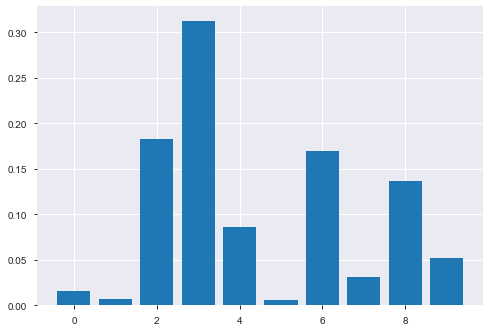

In [83]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

dt = DecisionTreeClassifier()

dt.fit(X, y)

importance = dt.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [84]:
select = indices[0:10]
dt = tree.DecisionTreeClassifier(max_depth=3)
dt = dt.fit(X_train.iloc[:,select], y_train)

In [85]:
train_pred = dt.predict(X_train.iloc[:,select])
test_pred = dt.predict(X_test.iloc[:,select])

In [86]:
print('Classification report \n')
print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_test,test_pred))

Classification report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6610
           1       0.93      0.88      0.90       906

    accuracy                           0.98      7516
   macro avg       0.96      0.93      0.95      7516
weighted avg       0.98      0.98      0.98      7516

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2833
           1       0.89      0.85      0.87       389

    accuracy                           0.97      3222
   macro avg       0.93      0.92      0.93      3222
weighted avg       0.97      0.97      0.97      3222



In [87]:
model3_dt2 = dt.predict(test)
model3_dt2

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
df = pd.read_csv('test.csv')

In [89]:
DF = pd.DataFrame(list(zip(df['customer_id'],model3_dt2)),columns=['customer_id','customer_category'])
DF.to_csv("DT2.csv",index=False)
DF.shape

(7160, 2)

#### SVM 

In [90]:
svc_lin = SVC()
svc_lin.set_params(kernel='linear',class_weight={0:0.60, 1:0.40})

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
%%time
svc_lin.fit(X_train,y_train)

CPU times: user 970 ms, sys: 21.7 ms, total: 992 ms
Wall time: 1.03 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
train_pred = svc_lin.predict(X_train)
test_pred = svc_lin.predict(X_test)

In [93]:
print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,test_pred))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_test,test_pred))

Confusion matrix 

[[2821   12]
 [  85  304]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6610
           1       0.97      0.80      0.88       906

    accuracy                           0.97      7516
   macro avg       0.97      0.90      0.93      7516
weighted avg       0.97      0.97      0.97      7516

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2833
           1       0.96      0.78      0.86       389

    accuracy                           0.97      3222
   macro avg       0.97      0.89      0.92      3222
weighted avg       0.97      0.97      0.97      3222



In [94]:
model4_svc = svc_lin.predict(test)
model4_svc

array([0, 0, 0, ..., 0, 0, 1])

In [95]:
df1 = pd.read_csv('test.csv')

In [96]:
DF = pd.DataFrame(list(zip(df1['customer_id'],model4_svc)),columns=['customer_id','customer_category'])
DF.to_csv("SVC.csv",index=False)
DF.shape

(7160, 2)

In [97]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
scaler.mean_

array([17.09125232,  0.17536692,  2.324377  ,  3.15899628,  5.26179907,
        5.76464962,  0.36748174, 19.06820058])

In [99]:
scaler.var_

array([3.41254063e+02, 1.35851525e-01, 3.04065343e+01, 1.06672091e+00,
       3.50818589e+00, 6.30126285e+00, 1.42121563e+00, 5.50232210e+01])

In [100]:
X_train[num_attr]=scaler.transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [101]:
model5_knn= KNeighborsClassifier(n_neighbors=5,metric="euclidean")
model5_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
train_pred = model5_knn.predict(X_train)
test_pred = model5_knn.predict(X_test)

In [103]:
print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,test_pred))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_test,test_pred))

Confusion matrix 

[[2813   20]
 [  85  304]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6610
           1       0.97      0.81      0.88       906

    accuracy                           0.97      7516
   macro avg       0.97      0.90      0.93      7516
weighted avg       0.97      0.97      0.97      7516

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2833
           1       0.94      0.78      0.85       389

    accuracy                           0.97      3222
   macro avg       0.95      0.89      0.92      3222
weighted avg       0.97      0.97      0.97      3222



In [104]:
model5_knn = model5_knn.predict(test)
model5_knn

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
df = pd.read_csv("test.csv")

In [106]:
DF = pd.DataFrame(list(zip(df1['customer_id'],model5_knn)),columns=['customer_id','customer_category'])
DF.to_csv("KNN.csv",index=False)
DF.shape

(7160, 2)

In [107]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 906
Before OverSampling, counts of label '0': 6610 

After OverSampling, the shape of train_X: (13220, 10)
After OverSampling, the shape of train_y: (13220,) 

After OverSampling, counts of label '1': 6610
After OverSampling, counts of label '0': 6610


In [108]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
train_pred = logreg.predict(X_train_res)
test_pred = logreg.predict(X_test)

In [110]:
print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,test_pred))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_train_res, train_pred))
print(metrics.classification_report(y_test,test_pred))

Confusion matrix 

[[2751   82]
 [  40  349]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6610
           1       0.97      0.91      0.94      6610

    accuracy                           0.94     13220
   macro avg       0.94      0.94      0.94     13220
weighted avg       0.94      0.94      0.94     13220

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2833
           1       0.81      0.90      0.85       389

    accuracy                           0.96      3222
   macro avg       0.90      0.93      0.91      3222
weighted avg       0.96      0.96      0.96      3222



In [111]:
model1_log1 = logreg.predict(test)
model1_log1

array([1, 0, 0, ..., 1, 0, 0])

In [112]:
df  = pd.read_csv("test.csv")

In [113]:
DF = pd.DataFrame(list(zip(df['customer_id'],model1_log1)),columns=['customer_id','customer_category'])
DF.to_csv("Log1.csv",index=False)
DF.shape

(7160, 2)

In [114]:
svc_lin = SVC()
svc_lin.set_params(kernel='linear',class_weight={0:0.60, 1:0.40})

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [115]:
%%time
svc_lin.fit(X_train_res,y_train_res)

CPU times: user 1.44 s, sys: 142 ms, total: 1.58 s
Wall time: 1.82 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [116]:
train_pred = svc_lin.predict(X_train_res)
test_pred = svc_lin.predict(X_test)

In [117]:
print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,test_pred))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_train_res, train_pred))
print(metrics.classification_report(y_test,test_pred))

Confusion matrix 

[[2787   46]
 [  44  345]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6610
           1       0.98      0.89      0.94      6610

    accuracy                           0.94     13220
   macro avg       0.94      0.94      0.94     13220
weighted avg       0.94      0.94      0.94     13220

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2833
           1       0.88      0.89      0.88       389

    accuracy                           0.97      3222
   macro avg       0.93      0.94      0.93      3222
weighted avg       0.97      0.97      0.97      3222



In [118]:
model4_svc1 = svc_lin.predict(test)
model4_svc1

array([1, 0, 0, ..., 1, 0, 0])

In [119]:
df1 = pd.read_csv('test.csv')

In [120]:
DF = pd.DataFrame(list(zip(df1['customer_id'],model4_svc1)),columns=['customer_id','customer_category'])
DF.to_csv("SVC1.csv",index=False)
DF.shape

(7160, 2)